# 1. 범주형 특성의 원핫인코딩 
### (One Hot Encoding)

## 1-1. 데이터 범주-연속-레이블로 나누기

In [1]:
import pandas as pd
data=pd.read_csv('Rotor_EN.csv', encoding='utf-8')

In [2]:
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [3]:
X1=data[['gender', 'region']]

In [4]:
X1.head()

,gender,region
0,1,4
1,1,5
2,1,3
3,2,1
4,1,1


In [5]:
X2=data[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']]

In [6]:
X2.head()

,edu,income,age,score_gov,score_progress,score_intention
0,3,3,3,2,2,4.0
1,2,3,3,2,4,3.0
2,1,2,4,1,3,2.8
3,2,1,3,5,4,2.6
4,1,2,4,4,3,2.4


In [7]:
y=data[['vote', 'parties']]

In [8]:
y.head()

,vote,parties
0,1,2
1,0,3
2,1,4
3,1,1
4,1,1


## 1-2. 범주형 특성의 웟핫인코딩 변환

In [9]:
X1['gender'] = X1['gender'].replace([1,2], ['male', 'female'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
X1.head()

,gender,region
0,male,4
1,male,5
2,male,3
3,female,1
4,male,1


In [11]:
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [13]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
gender    211 non-null object
region    211 non-null object
dtypes: object(2)
memory usage: 3.4+ KB


In [59]:
X1_dum=pd.get_dummies(X1)
#pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [63]:
X1_dum.head()
#One-hot-encoding 결과 확인
#X1_dum는 범주형데이터 gender, region을 포함하는 X1을 One-hot-encoding한 결과를 저장하고 있다.

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


# 2. 연속형 특성의 Scaling

In [64]:
#연속형데이터는 X2에 분리하여 저장하고 있다.
X2.describe()

,edu,income,age,score_gov,score_progress,score_intention
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900
std,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000
50%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000
max,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C62647208>,
      dtype=object)

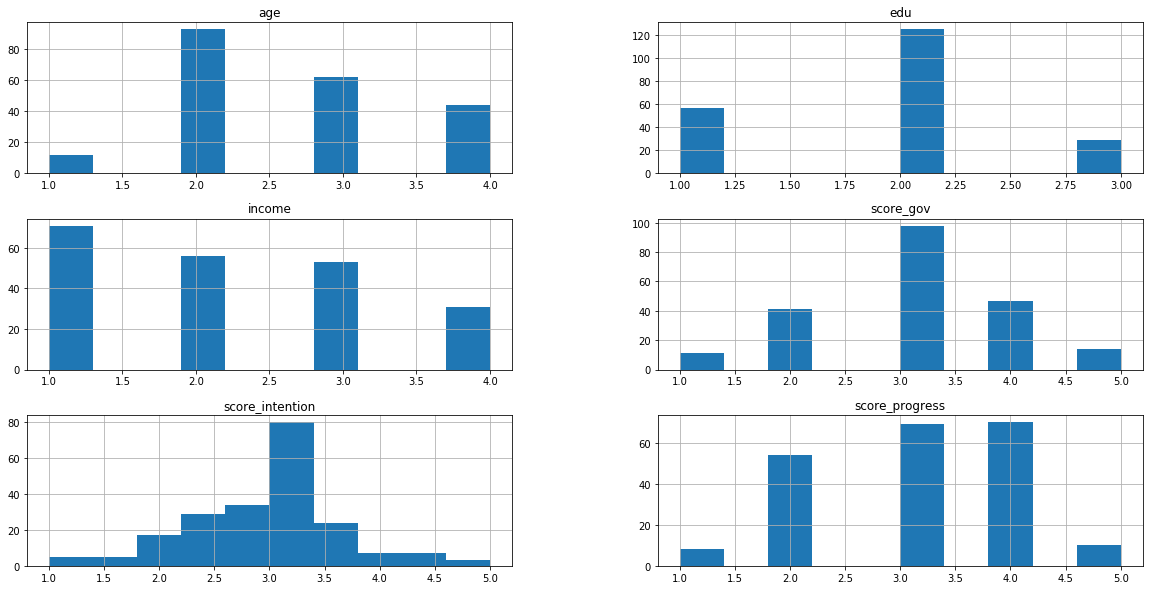

In [65]:
#연속형데이터의 상태를 확인하기 위하여 그래프를 출력해보고자 한다.
#그래프를 출력하기 위해서는 다음의 라이브러리를 선언해준다.
import matplotlib.pyplot as plt

#X2의 연속형데이터를 그래프로 출력하자.
pd.DataFrame(X2).hist(figsize=(20,10))

## 2-1. Min-Max 스케일링

In [66]:
#연속형데이터를 스케일링하는 방법 중에서 min-max 스케일링을 수행하기 위한 라이브러리를 선언한다.
from sklearn.preprocessing import MinMaxScaler

In [79]:
#함수의 표현을 간단하게 하기 위해 MinMaxScaler()를 scaler1으로 지칭하자
scaler1=MinMaxScaler()
#MinMaxScaler(feature_range=(0, 1), copy=True)
#Methods
#fit(self, X[, y])	Compute the minimum and maximum to be used for later scaling.
#fit_transform(self, X[, y])	Fit to data, then transform it.
#get_params(self[, deep])	Get parameters for this estimator.
#inverse_transform(self, X)	Undo the scaling of X according to feature_range.
#partial_fit(self, X[, y])	Online computation of min and max on X for later scaling.
#set_params(self, \*\*params)	Set the parameters of this estimator.
#transform(self, X)	Scaling features of X according to feature_range.

In [80]:
scaler1

MinMaxScaler(copy=True, feature_range=(0, 1))

In [81]:
#연속형데이터 X2는 6개의 feature로 구성되어 있다.
X2.head()

,edu,income,age,score_gov,score_progress,score_intention
0,3,3,3,2,2,4.0
1,2,3,3,2,4,3.0
2,1,2,4,1,3,2.8
3,2,1,3,5,4,2.6
4,1,2,4,4,3,2.4


In [82]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 6 columns):
edu                211 non-null int64
income             211 non-null int64
age                211 non-null int64
score_gov          211 non-null int64
score_progress     211 non-null int64
score_intention    211 non-null float64
dtypes: float64(1), int64(5)
memory usage: 10.0 KB


In [87]:
#연속형데이터 X2에 대해 min-max 스케일링에서 사용할 최소값과 최대값을 구하자.
scaler1.fit(X2)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [88]:
#연속형데이터 X2를 min-max 스케일링으로 변환한다.
X_scaled1=scaler1.transform(X2)

In [90]:
X_scaled1
#데이터는 리스트 형태를 가진다.

array([[1.        , 0.66666667, 0.66666667, 0.25      , 0.25      ,
        0.75      ],
       [0.5       , 0.66666667, 0.66666667, 0.25      , 0.75      ,
        0.5       ],
       [0.        , 0.33333333, 1.        , 0.        , 0.5       ,
        0.45      ],
       ...,
       [0.5       , 0.        , 0.33333333, 0.5       , 0.5       ,
        0.4       ],
       [0.5       , 0.66666667, 1.        , 0.5       , 0.25      ,
        0.75      ],
       [0.5       , 0.33333333, 0.33333333, 0.5       , 0.5       ,
        0.7       ]])

In [91]:
#리스트 형태의 데이터를 Pandas 데이터프레임으로 변환한다.
pdXscaled1=pd.DataFrame(X_scaled1)

In [92]:
pdXscaled1.head()

,0,1,2,3,4,5
0,1.0,0.666667,0.666667,0.25,0.25,0.75
1,0.5,0.666667,0.666667,0.25,0.75,0.50
2,0.0,0.333333,1.000000,0.00,0.50,0.45
3,0.5,0.000000,0.666667,1.00,0.75,0.40
4,0.0,0.333333,1.000000,0.75,0.50,0.35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C627DB320>,
      dtype=object)

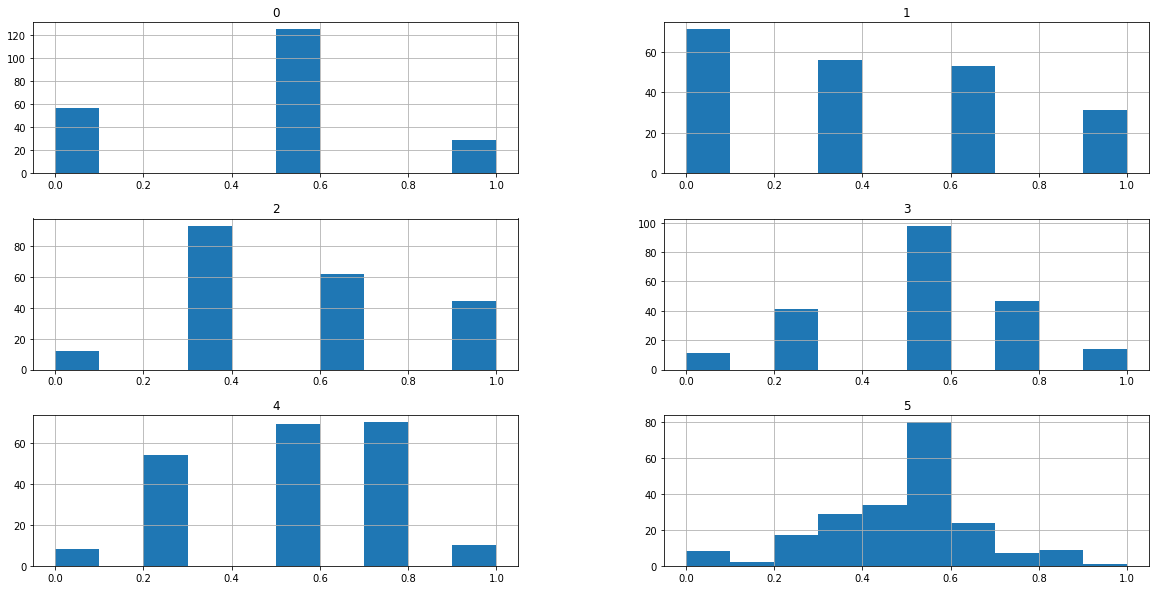

In [93]:
pdXscaled1.hist(figsize=(20,10))

In [94]:
pdXscaled1.describe()

,0,1,2,3,4,5
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.433649,0.402844,0.551343,0.514218,0.523697,0.477725
std,0.312982,0.355475,0.290724,0.236113,0.240352,0.181269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.500000,0.250000,0.350000
50%,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2-2. Standardization 스케일링

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler2=StandardScaler()

In [97]:
scaler2.fit(X2)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [98]:
X_scaled2=scaler2.transform(X2)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [101]:
pdXscaled2=pd.DataFrame(X_scaled2)

In [102]:
pdXscaled2.describe()

,0,1,2,3,4,5
count,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02
mean,-3.499044e-17,1.360155e-16,3.635849e-16,-1.473939e-16,-1.237820e-16,-1.967883e-16
std,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00
min,-1.388837e+00,-1.135950e+00,-1.900955e+00,-2.183028e+00,-2.184055e+00,-2.641710e+00
25%,-1.388837e+00,-1.135950e+00,-7.516670e-01,-6.036022e-02,-1.141440e+00,-7.062904e-01
50%,2.124996e-01,-1.960071e-01,3.976209e-01,-6.036022e-02,-9.882600e-02,1.231749e-01
75%,2.124996e-01,7.439362e-01,3.976209e-01,1.000974e+00,9.437883e-01,6.761518e-01
max,1.813836e+00,1.683879e+00,1.546909e+00,2.062307e+00,1.986403e+00,2.888059e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C62E9FD30>,
      dtype=object)

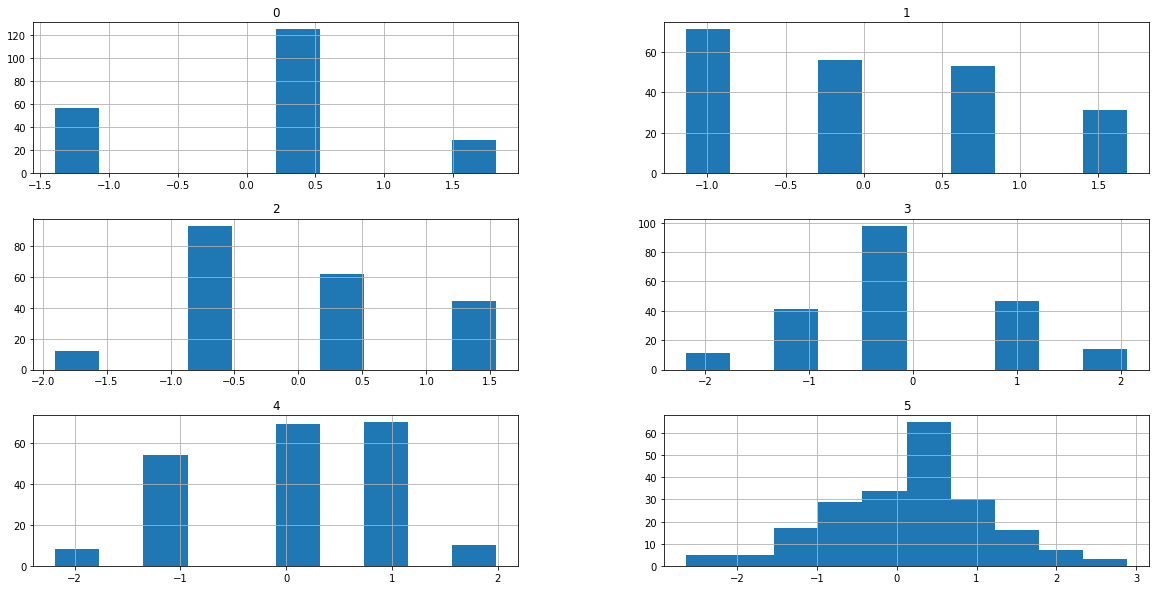

In [103]:
pdXscaled2.hist(figsize=(20,10))

# 3. 자료 통합 및 저장하기

In [104]:
import pandas as pd

In [105]:
X_scaled=pd.DataFrame(X_scaled1)

In [106]:
X_scaled.columns=['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']

In [107]:
Fvote=pd.concat([X1_dum, X_scaled, y], axis=1)

In [108]:
Fvote.head()

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,1.0,0.666667,0.666667,0.25,0.25,0.75,1,2
1,0,1,0,0,1,0,0,0.5,0.666667,0.666667,0.25,0.75,0.50,0,3
2,0,1,0,1,0,0,0,0.0,0.333333,1.000000,0.00,0.50,0.45,1,4
3,1,0,0,0,0,1,0,0.5,0.000000,0.666667,1.00,0.75,0.40,1,1
4,0,1,0,0,0,1,0,0.0,0.333333,1.000000,0.75,0.50,0.35,1,1


In [109]:
Fvote.to_csv('Fvote.csv', sep=',', encoding='utf-8')